In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt

In [2]:
auth_csv_path = "./auth_endpoint_values.csv"
service_csv_path = "./service_endpoint_values.csv"

In [3]:
def convert_cpu_to_dict(file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], 'cpu_utils': row[1]})
    return data

def convert_resp_to_dict(file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], 'response_time': row[3]})
    return data

def convert_resp_95_to_dict(file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], 'p95_response_time': row[4]})
    return data



In [4]:
auth_service_values = convert_cpu_to_dict(auth_csv_path)
service_endpoint_values = convert_cpu_to_dict(service_csv_path)

In [11]:
workers = [int(x['workers']) for x in auth_service_values]
auth_cpu_utlis = [(float(x['cpu_utils']))/4 for x in auth_service_values]
service_cpu_utlis = [(float(x['cpu_utils']))/4 for x in service_endpoint_values]
total_cpu = [x + y for x, y in zip(auth_cpu_utlis, service_cpu_utlis)]

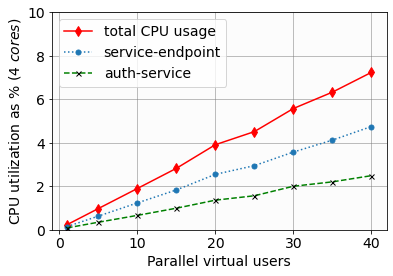

In [41]:
plt.rc('font', size=14)  
fig, axs = plt.subplots()
axs.set_ylim([0, 10])
axs.set_facecolor('#fcfcfc')

axs.set_xlabel('Parallel virtual users')

axs.set_ylabel('CPU utilization as % $\it{(4~cores)}$')
axs.plot(workers, total_cpu, 'r', label='total CPU usage', marker='d', markersize=7)
axs.plot(workers, service_cpu_utlis, linestyle='dotted',label='service-endpoint', marker='o', markersize=5)
axs.plot(workers, auth_cpu_utlis, 'g--' ,label='auth-service', marker='x', mec='k', markersize=5)

axs.legend()
axs.grid(axis='both', color='#7D7D7D', linestyle='-', linewidth=0.5)
plt.savefig("auth_token_cpu_util.pdf")
plt.show()


In [42]:
service_endpoint_resp_values = convert_resp_to_dict(service_csv_path)
service_endpoint_resp_values = [float(x['response_time']) for x in service_endpoint_resp_values]



service_endpoint_95_resp_values = convert_resp_95_to_dict(service_csv_path)
service_endpoint_95_resp_values = [float(x['p95_response_time']) for x in service_endpoint_95_resp_values]


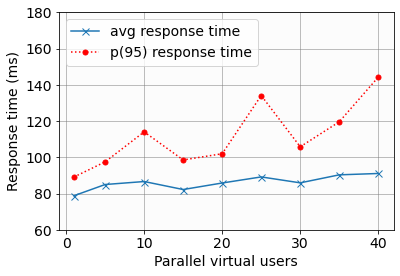

In [43]:
#plt.rc('font', size=20)          # controls default text sizes
fig, axs = plt.subplots()
axs.set_ylim([60, 180])
axs.set_facecolor('#fcfcfc')

axs.grid(axis='both', color='#7D7D7D', linestyle='-', linewidth=0.5, zorder=0)

axs.set_xlabel('Parallel virtual users')

axs.set_ylabel('Response time (ms)')

#p1 = axs.bar(workers, service_endpoint_resp_values, 3, zorder=3, alpha=0.9)
axs.plot(workers, service_endpoint_resp_values, label='avg response time',  marker='x', markersize=7)

axs.plot(workers, service_endpoint_95_resp_values, 'r', linestyle='dotted',label='p(95) response time', marker='o', markersize=5)
axs.legend(loc='upper left')

plt.savefig("auth_token_response_time.pdf")
plt.show()
